# Example for reading depth data file

In [5]:
import zlib
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
import os, os.path
import json

In [2]:
depth_path = './tmp/Depth'

# Depth data parameters
w = 640
h = 480

### Read and decompress the depth data

In [3]:
with open(depth_path, 'rb') as f:
    data = zlib.decompress(f.read(), -15)

In [4]:
FRAME_COUNT = int(len(data) / w / h / 2)
print (FRAME_COUNT)

668


### Convert bytes to numpy array and set NaNs to zero

In [5]:
frames = np.frombuffer(data, np.float16).reshape(FRAME_COUNT,h,w).copy()
frames = np.nan_to_num(frames, 0)

### Preprocess data for visualization

In [6]:
maxim = frames.max()
frames *= 1000
imgs = frames.astype('uint16')

220.9
0.0
<class 'numpy.ndarray'>
(480, 640)


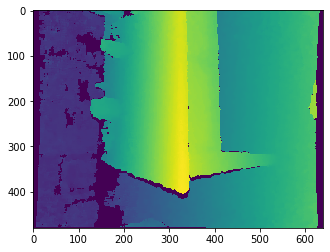

In [7]:
print(frames[600].max())
print(frames[600].min())
print(type(frames[600]))
print(frames[600].shape)
plt.imshow(imgs[600])

### Write depth video to a  file

In [28]:
# FPS = 25 # TODO: figure out the correct fps
# fourcc = cv2.VideoWriter_fourcc(*'mpv4')
# out = cv2.VideoWriter('./depth_video.mp4',fourcc, FPS, (h,w))
depthPath = "./depth/"
imgpath = "./image/"

for i in range(FRAME_COUNT):
    cv2.imwrite(depthPath + "depth" + str(i+1).zfill(5) + ".png", np.flip(imgs[i,:,:].T, axis=1))
#     out.write(cv2.cvtColor(np.flip(imgs[i,:,:].T, axis=1), cv2.COLOR_GRAY2BGR))

# out.release()

### Process depth image

In [10]:
dataCount = len([name for name in os.listdir('./data/')])
dataPath = "./data/"
depthPath = "./depth/"
for idx in range(1, dataCount + 1):
    with open(dataPath + "data" + str(idx) + ".json") as f:
        data = json.load(f)
    array = np.array(data['data'])
    mat = np.reshape(array, (-1, 640))
    print(mat.shape)
    mat = mat * 1000
    mat = mat.astype(np.uint16)
    mat = ndimage.rotate(mat, -90)
    cv2.imwrite(depthPath + "depth" + str(idx).zfill(5) + ".png", mat)

(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)
(240, 640)


### Extract Frames from Video File

In [3]:
vidcap = cv2.VideoCapture('output.mov')
success,image = vidcap.read()
i = 1
while success:
    pixels = cv2.resize(image, dsize=(640, 480), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite("./image/image"+str(i).zfill(5) + ".png", np.rot90(pixels, axes = (1,0)))     # save frame as PNG file      
    success,image = vidcap.read()
    i += 1

### Show one frame

2576


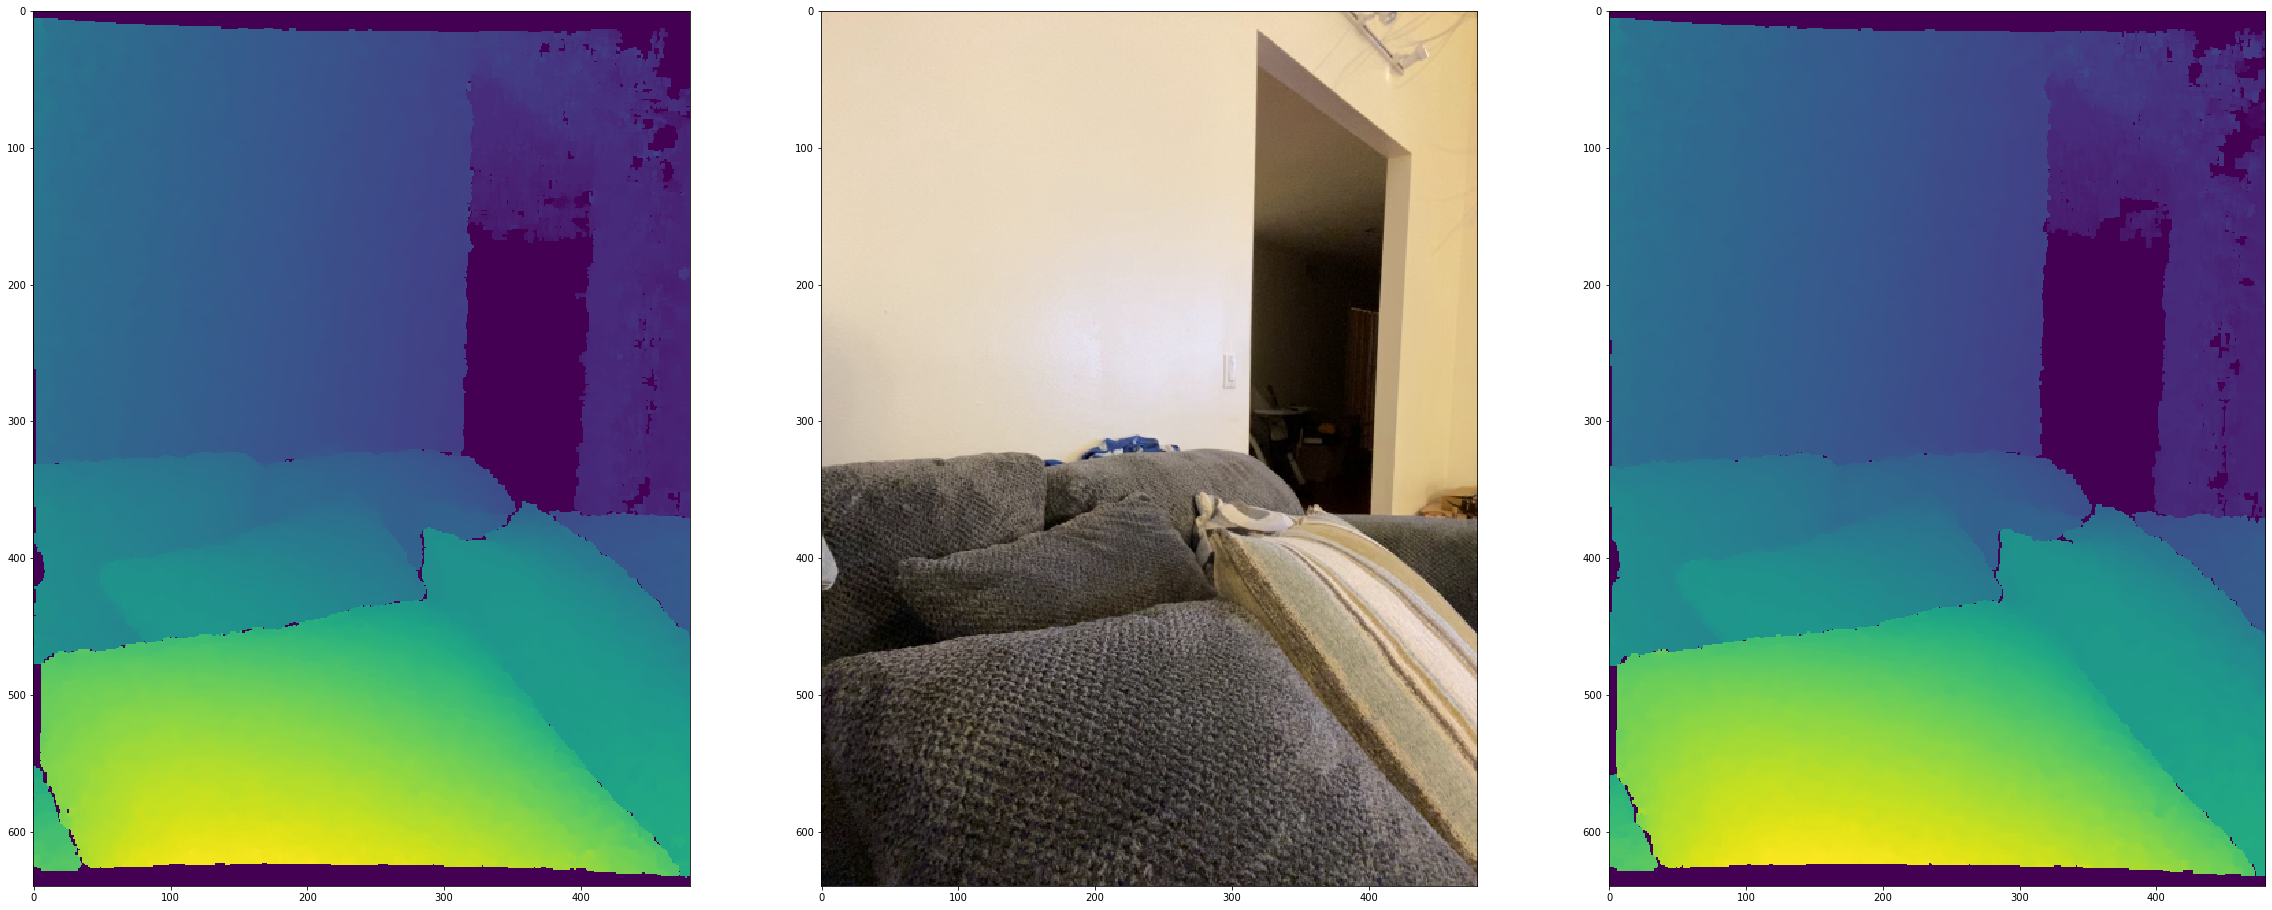

In [15]:
fig = plt.figure(figsize = (40, 60))
fig.add_subplot(1, 3, 1)
plt.imshow(np.flip(imgs[0,:,:].T, axis=1))
print(imgs[0,:,:].max())
img = cv2.imread( "./image/image00001.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig.add_subplot(1, 3, 2)
plt.imshow(img)
fig.add_subplot(1, 3, 3)
plt.imshow(np.flip(imgs[1,:,:].T, axis=1))

### Calculate Intrinsic Matrix

In [16]:
intrinsic = np.array([[2748.694, 0.0, 0.0],[0.0, 2748.694, 0.0],[2013.149, 1515.2545, 1.0]])
print (intrinsic / 5.25)

[[5.23560762e+02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.23560762e+02 0.00000000e+00]
 [3.83456952e+02 2.88619905e+02 1.90476190e-01]]


2576
2434
816
2450
2349


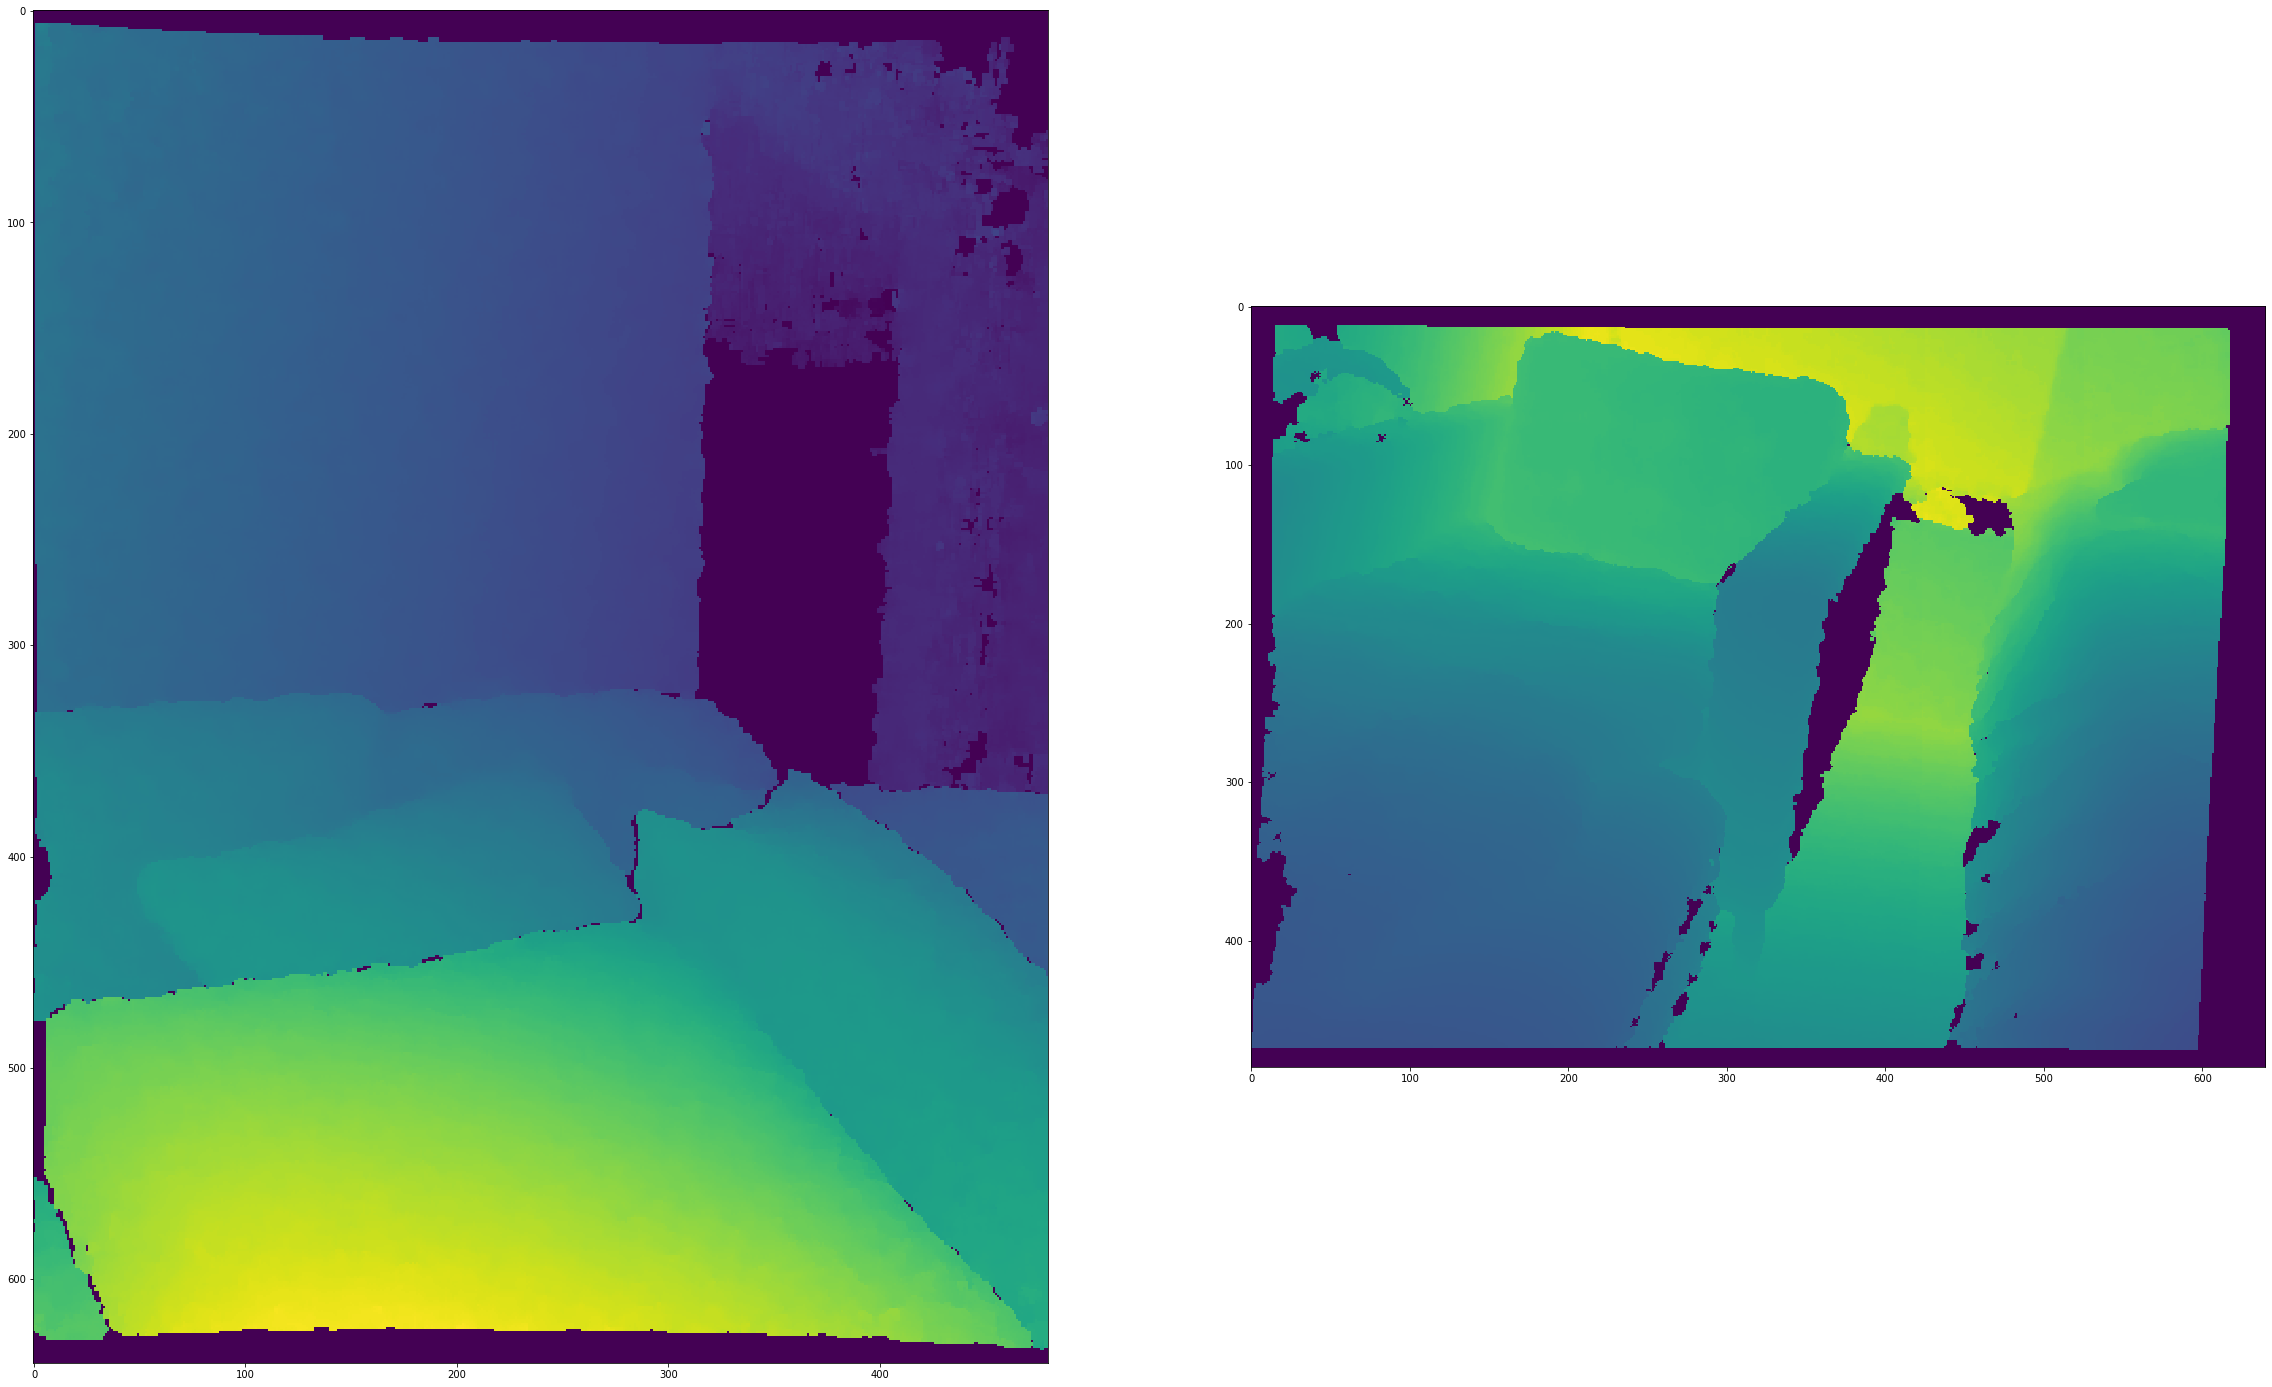

In [32]:
fig = plt.figure(figsize = (40, 60))
fig.add_subplot(1, 2, 1)
img = cv2.imread( "./depth/depth00001.png", cv2.IMREAD_UNCHANGED)
plt.imshow(img)
print(img.max())
print(img[600][100])
print(img[200][100])
img = cv2.imread( "./depth00731.png", cv2.IMREAD_UNCHANGED)
fig.add_subplot(1, 2, 2)
plt.imshow(img)
print(img.max())
print(img[20][250])